In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Basado en el código de Allen B. Downey


class CA(object):
    """Representa un autómata celular 1D.
    
    Los parámetros del constructor son:

    rule:  Un entero del 0-255.
    n:      Número de renglones (timesteps).
    ratio:  Razón de los renglones a las columnas
    """

    def __init__(self, rule, n=100, ratio=2):
        """
        Atributos:
        table:  Diccionario que mapea el estado, al siguiente.
        n, m:   Renglones, columnas.
        array:  Arreglo que contiene los datos.
        next:   Índice del siguiente estado.
        """
        self.table = self.make_table(rule)
        self.n = n
        self.m = ratio*n + 1
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def make_table(self, rule):
        """Regresa la tabla con las reglas del CA 
        (Implementada como un diccionario).
        """
        table = {}
        for i, bit in enumerate(binary(rule, 8)):
            t = binary(7-i, 3)
            table[t] = bit
        return table
    
    def start_single(self):
        """La semilla es una sola y aparece a la mitad del arreglo 1D."""
        self.array[0, int(self.m/2)] = 1
        self.next += 1

    def start_random(self):
        """Valores aleatorios en el tiempo t_0"""
        self.array[0] = np.random.random([1,self.m]).round()
        self.next += 1

    def loop(self, steps=1):
        """Ejecuta el número especificado de pasos."""
        [self.step() for i in range(steps)]

    def step(self):
        """Avanza un paso t -> t+1."""
        i = self.next
        self.next += 1

        a = self.array
        t = self.table
        for j in range(1,self.m-1):
            a[i,j] = t[tuple(a[i-1, j-1:j+2])]

    def get_array(self, start=0, end=None):
        """Obtiene una rebanada de las columnas del CA.
        """
        if start==0 and end==None:
            return self.array
        else:
            return self.array[:, start:end]


In [31]:

def binary(n, digits):
    """Regresa una tupla de enteros representando (n) en binario."""
    t = []
    for i in range(digits):
        n, r = divmod(n, 2)
        t.append(r)

    return tuple(reversed(t))

In [29]:
def getEvolvedCA(rule,n=30):
    ca = CA(rule, n)
    ca.start_single()
    ca.loop(n - 1)
    return ca.get_array()


In [35]:
class MosaicCADrawer(object):
    def __init__(self,time_steps):
        self.rows = 26
        self.cols = 10
        self.time_steps = time_steps
    def draw(self):
        fig, ax = plt.subplots(self.rows, self.cols, figsize=(100, 80), sharey=True)
        for row in range(self.rows):
            for col in range(self.cols):
                rule = row * self.cols + col
                if rule <= 255:
                    ca_universe = getEvolvedCA(rule, self.time_steps)
                    
                    ax[row, col].imshow(-ca_universe)
                    ax[row, col].set_label(rule)
                
                ax[row, col].set_xticks([])
                ax[row, col].set_yticks([])

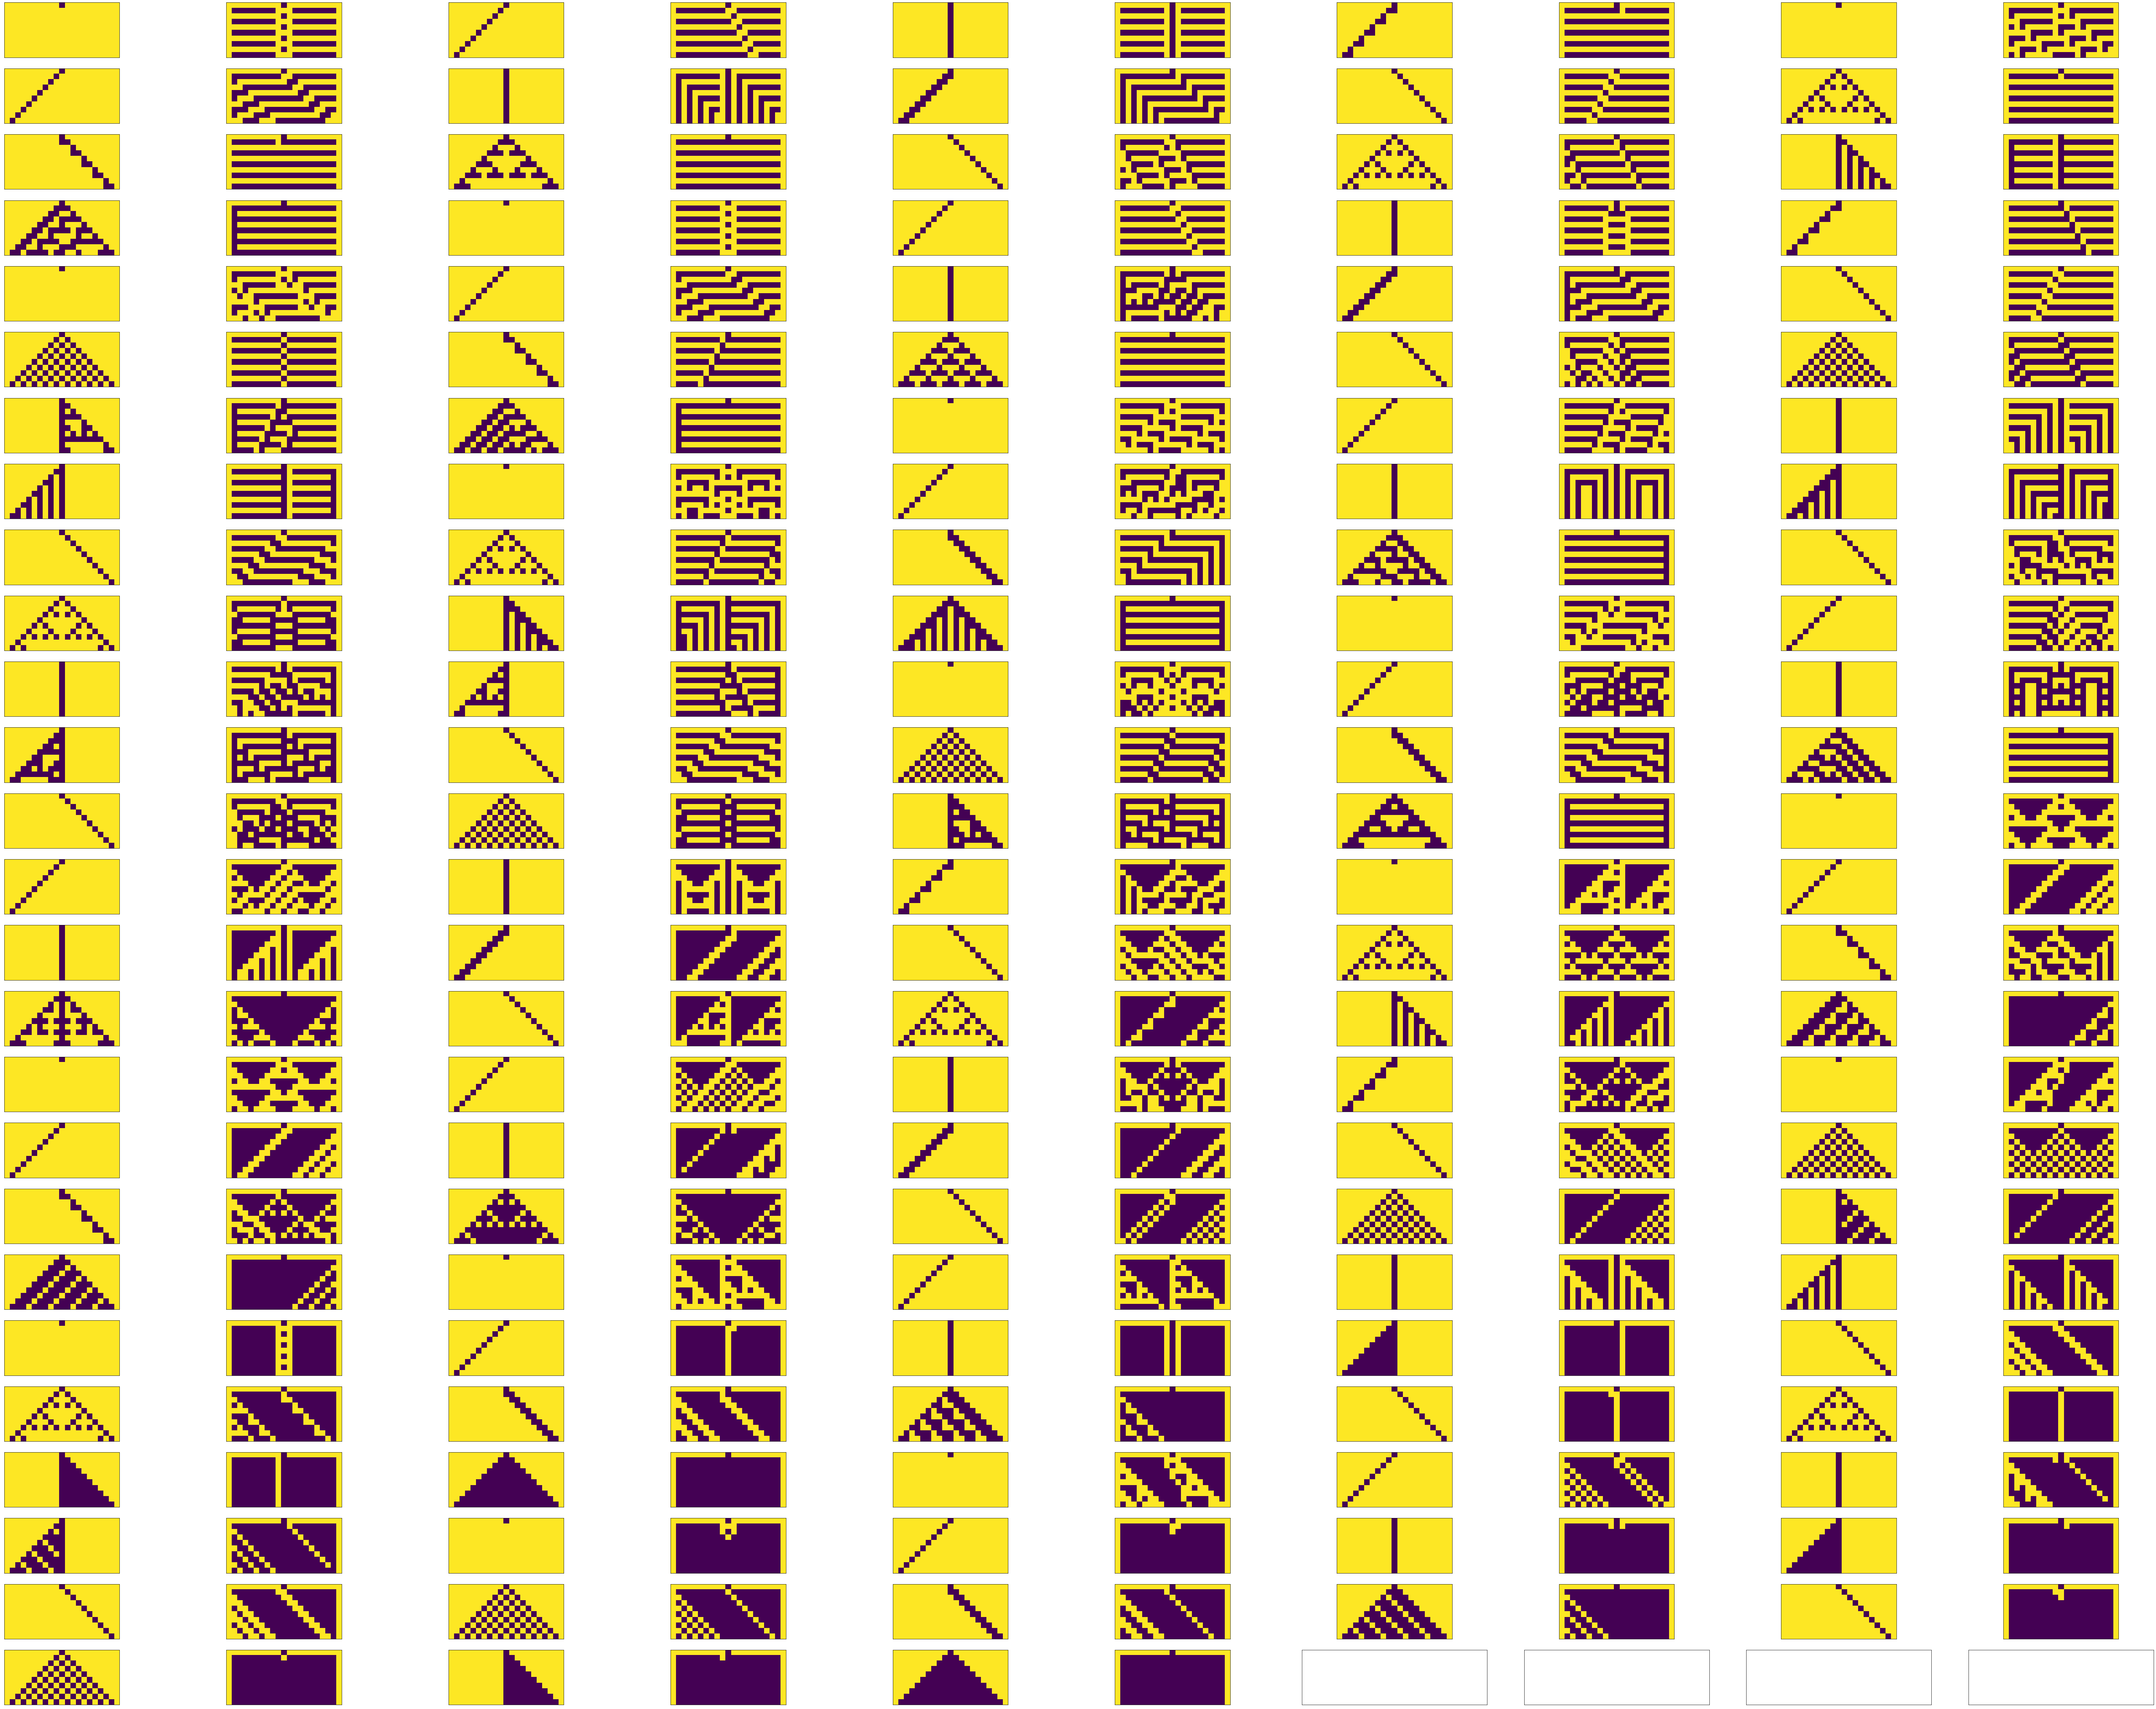

In [37]:
ca_drawer = MosaicCADrawer(10)
ca_drawer.draw()

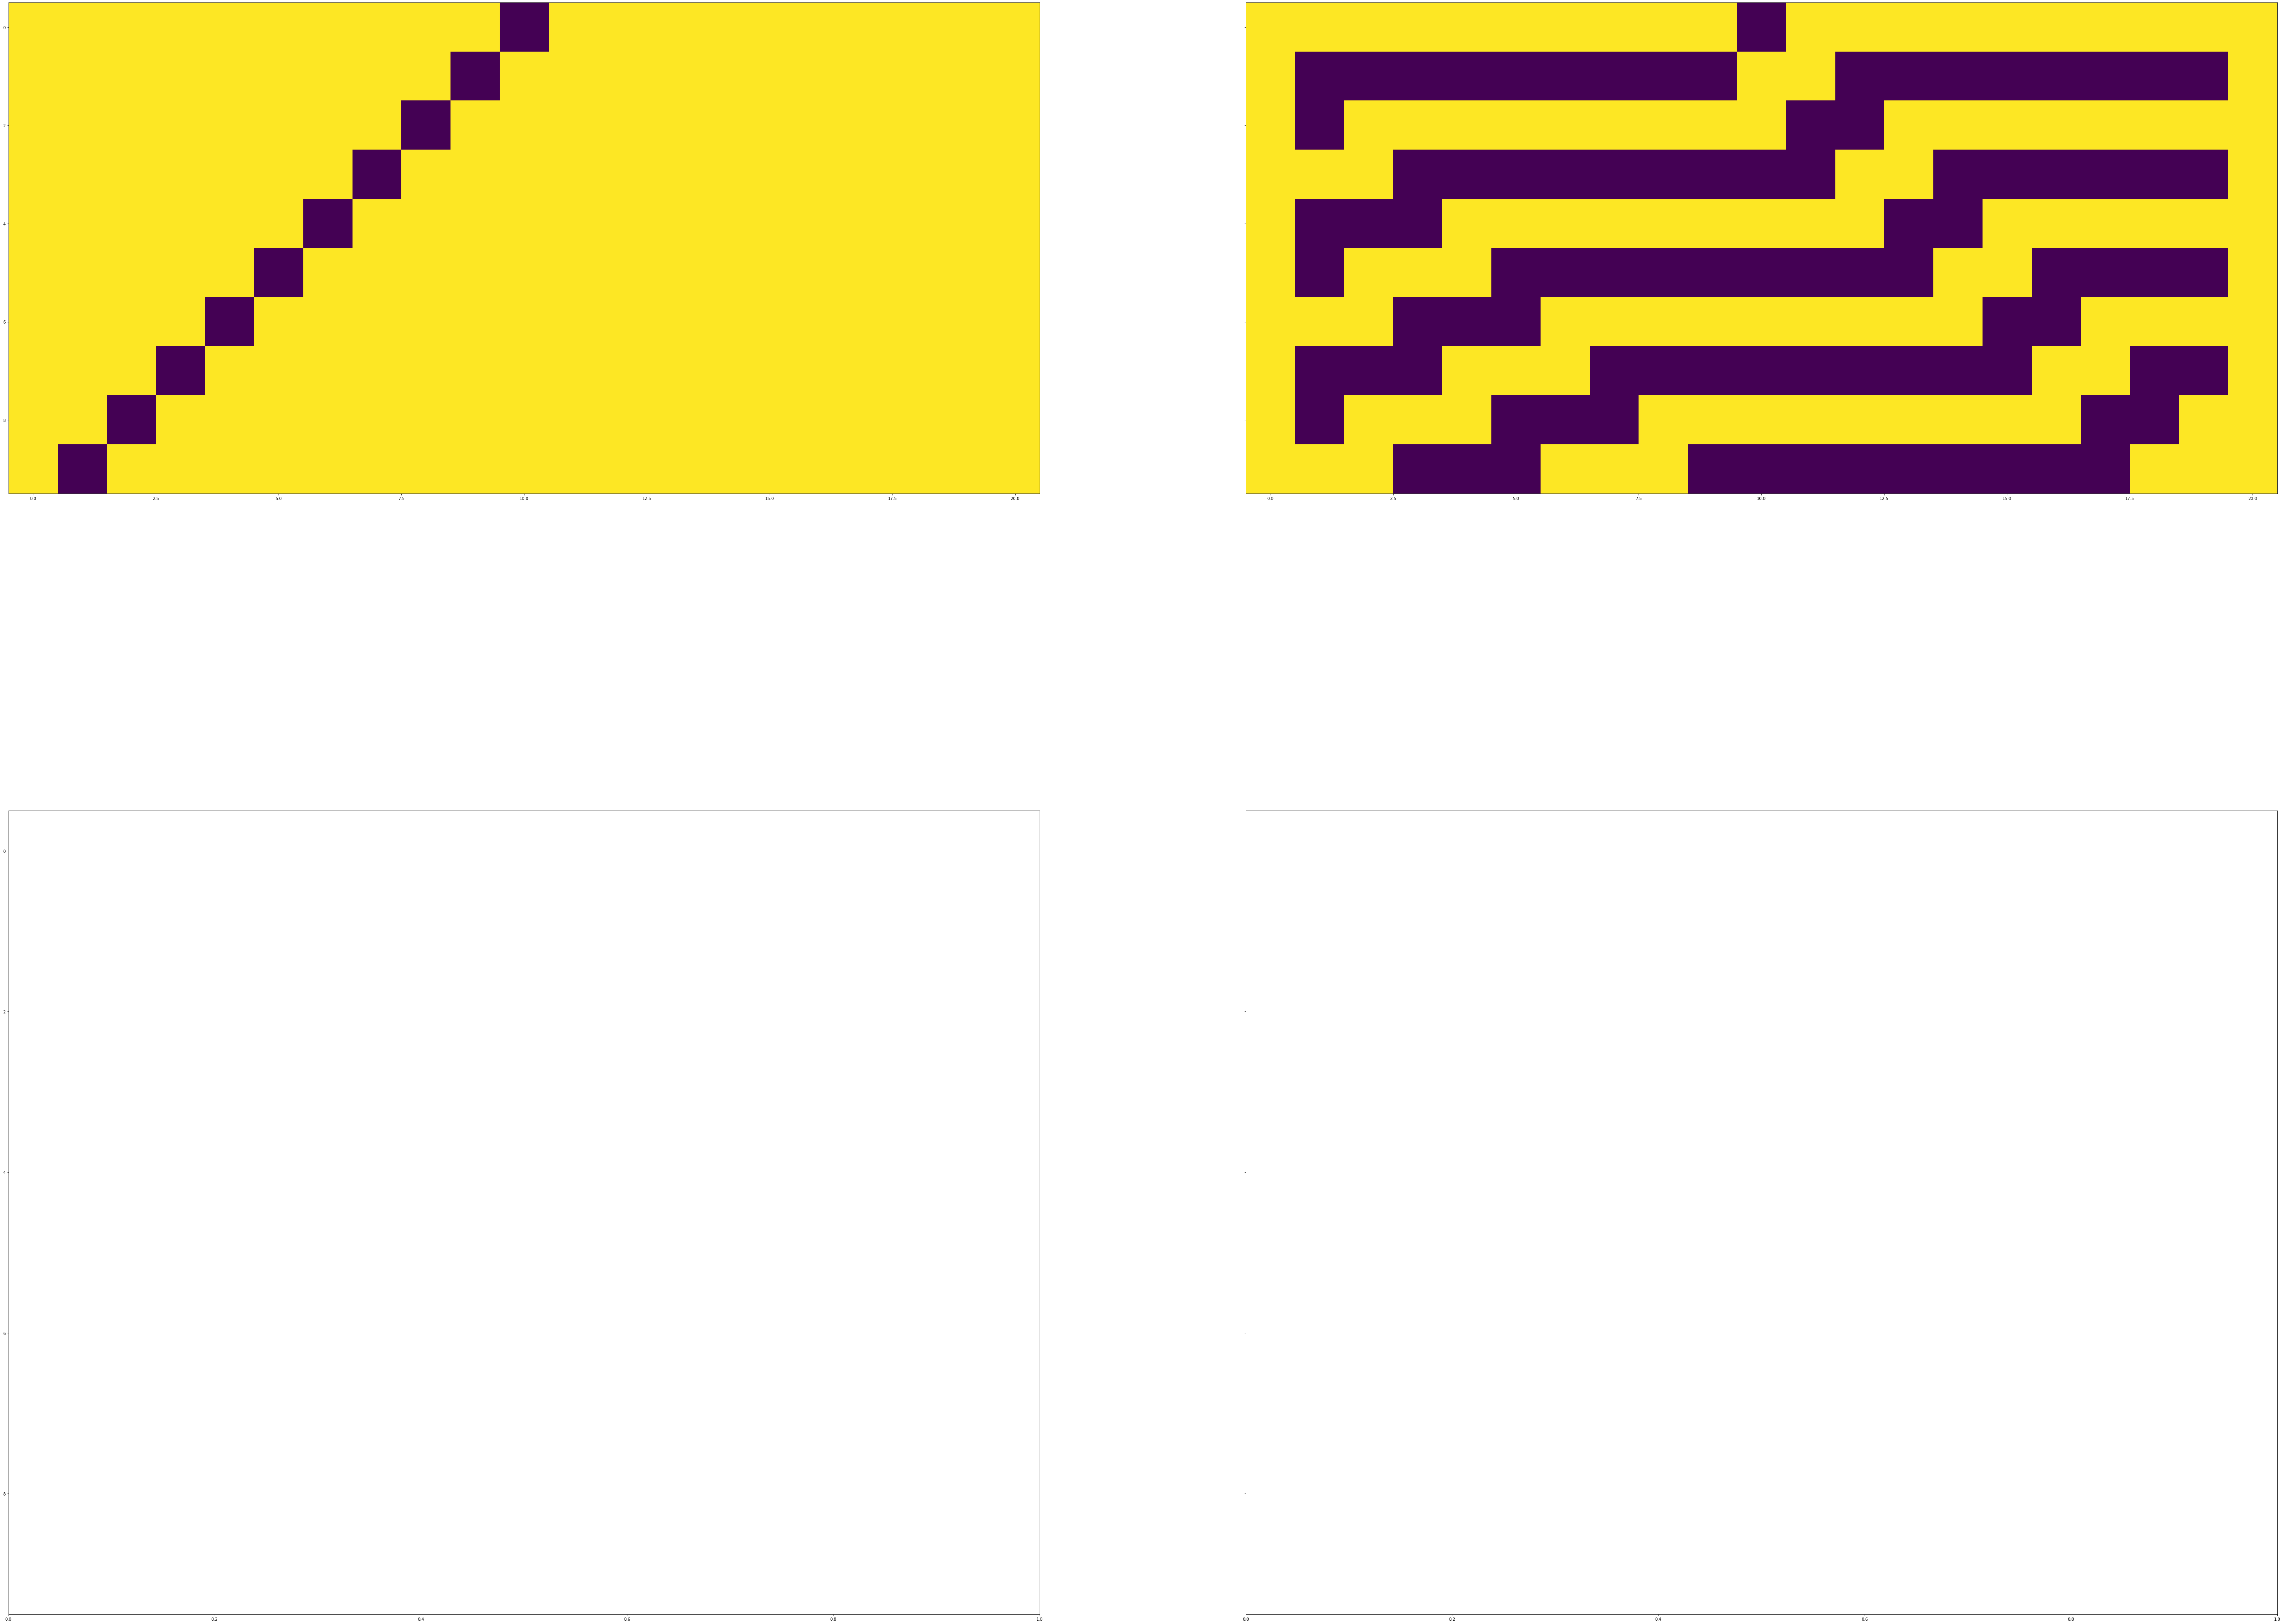

In [32]:
fig,ax=plt.subplots(2,2,figsize=(100,80), sharey=True)
universe = getEvolvedCA(10,10)
ax[0,0].imshow(-universe)
universe=getEvolvedCA(11,10)
ax[0,1].imshow(-universe)

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [12]:
X = np.loadtxt('edad-Copy1.dat')
Y = np.loadtxt('altura-Copy1.dat')

Text(0, 0.5, 'Altura (m)')

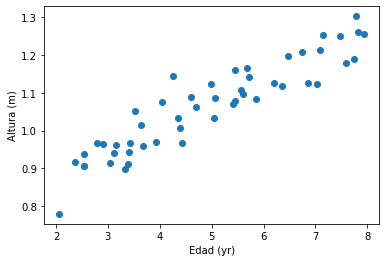

In [13]:
plt.scatter(X,Y, label="data")
plt.xlabel('Edad (yr)')
plt.ylabel('Altura (m)')

Sea  $\textbf{J}(\mathbf\beta_0, \mathbf\beta_1)$ la función que definimos como una variable _ecua1_ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D